In [1]:
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [2]:
print(train_data.shape)

(404, 13)


In [3]:
print(test_data.shape)

(102, 13)


In [4]:
print(test_targets)

[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]


In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [6]:
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return modelЯ

In [7]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
all_loss = []
all_val_loss = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model_100 = build_model()
    history_100 = model_100.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, validation_data=(val_data, val_targets), verbose=0)
    val_mse, val_mae = model_100.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0


C:\Users\LEGION\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


processing fold # 1
processing fold # 2
processing fold # 3
2.416716605424881


In [8]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 50
all_scores = []
all_loss = []
all_val_loss = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model_50 = build_model()
    history_50 = model_50.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, validation_data=(val_data, val_targets), verbose=0)
    val_mse, val_mae = model_50.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.341396927833557


In [9]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 10
all_scores = []
all_loss = []
all_val_loss = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model_10 = build_model()
    history_10 = model_10.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, validation_data=(val_data, val_targets), verbose=0)
    val_mse, val_mae = model_10.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.601828634738922


In [10]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 150
all_scores = []
all_loss = []
all_val_loss = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model_150 = build_model()
    history_150 = model_150.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, validation_data=(val_data, val_targets), verbose=0)
    val_mse, val_mae = model_150.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.764945149421692


In [11]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 1
all_scores = []
all_loss = []
all_val_loss = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model_1 = build_model()
    history_1 = model_1.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, validation_data=(val_data, val_targets), verbose=0)
    val_mse, val_mae = model_1.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
4.386425971984863


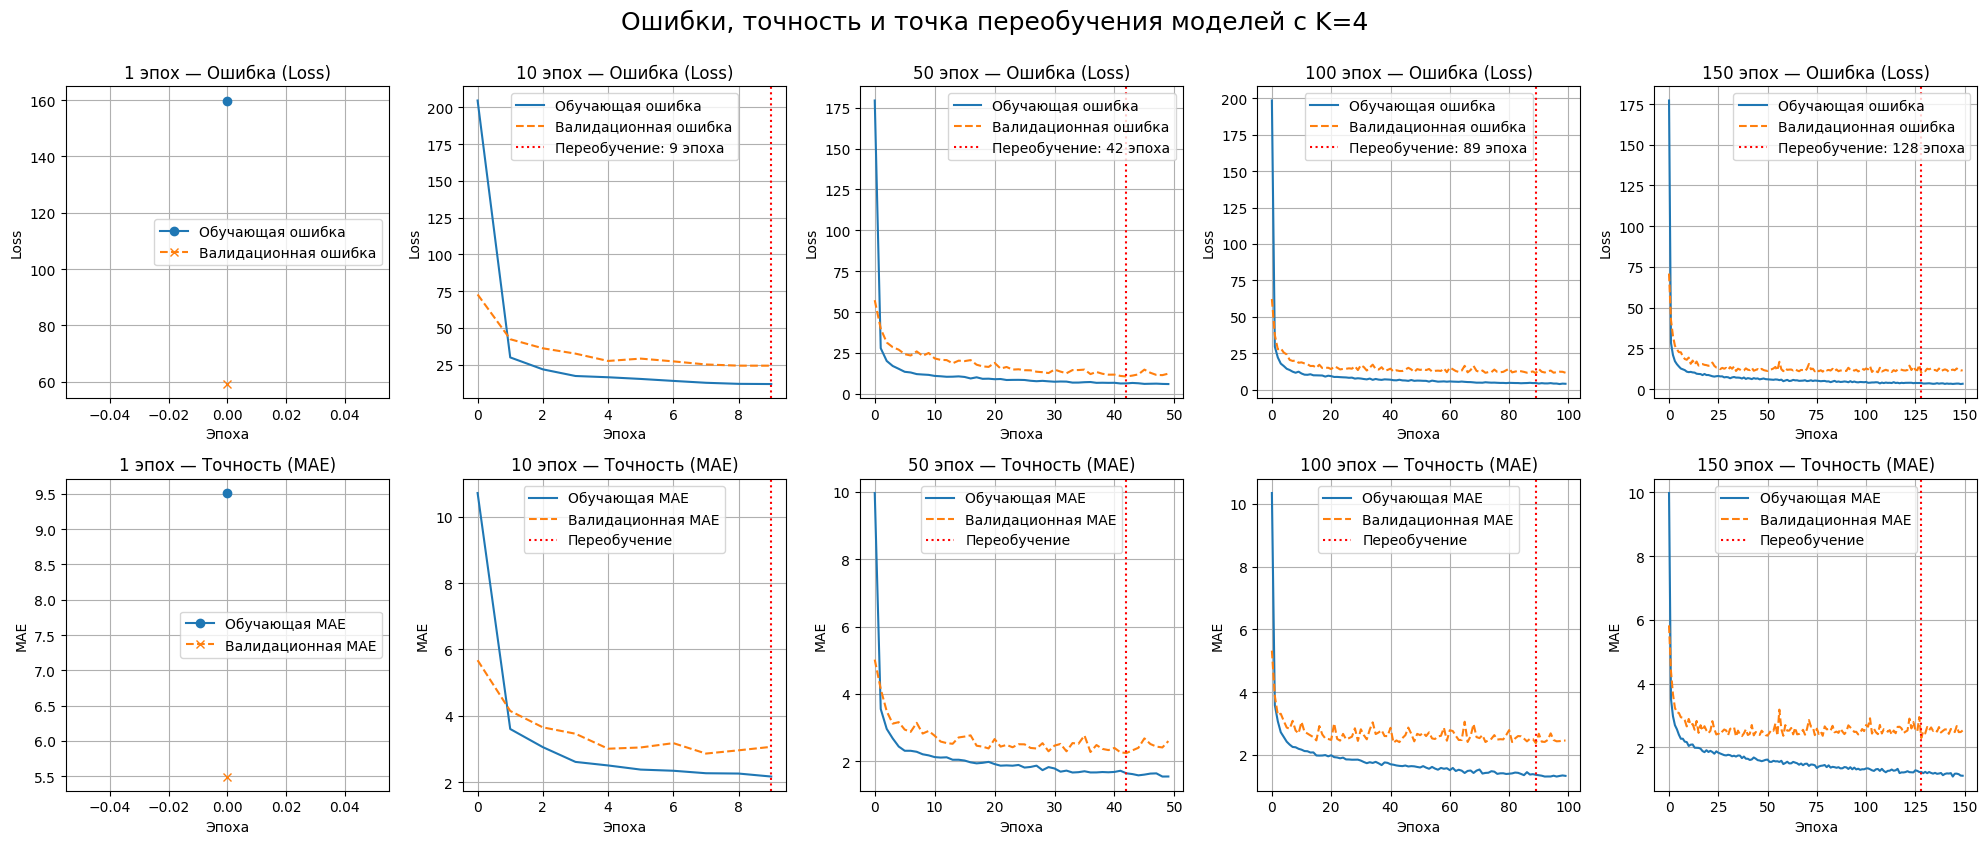

In [31]:
import matplotlib.pyplot as plt
import numpy as np

histories = [history_1, history_10, history_50, history_100, history_150]
epochs_list = [1, 10, 50, 100, 150]

fig, axes = plt.subplots(2, len(histories), figsize=(20, 8))
axes = axes.reshape(2, len(histories))

for i in range(len(histories)):
    history = histories[i].history

    # --- Ошибка (Loss) ---
    loss_ax = axes[0][i]
    if len(history['loss']) == 1:
        loss_ax.plot([0], [history['loss'][0]], label='Обучающая ошибка', marker='o')
        loss_ax.plot([0], [history['val_loss'][0]], label='Валидационная ошибка', marker='x', linestyle='--')
    else:
        loss_ax.plot(history['loss'], label='Обучающая ошибка')
        loss_ax.plot(history['val_loss'], label='Валидационная ошибка', linestyle='--')

        # Находим эпоху с минимальной val_loss (точка переобучения)
        min_epoch = np.argmin(history['val_loss'])
        loss_ax.axvline(x=min_epoch, color='red', linestyle=':', label=f'Переобучение: {min_epoch} эпоха')

    loss_ax.set_title(f'{epochs_list[i]} эпох — Ошибка (Loss)')
    loss_ax.set_xlabel('Эпоха')
    loss_ax.set_ylabel('Loss')
    loss_ax.legend()
    loss_ax.grid(True)

    # --- Точность (MAE) ---
    mae_ax = axes[1][i]
    if len(history['mae']) == 1:
        mae_ax.plot([0], [history['mae'][0]], label='Обучающая MAE', marker='o')
        mae_ax.plot([0], [history['val_mae'][0]], label='Валидационная MAE', marker='x', linestyle='--')
    else:
        mae_ax.plot(history['mae'], label='Обучающая MAE')
        mae_ax.plot(history['val_mae'], label='Валидационная MAE', linestyle='--')

        # Тот же min_epoch для отображения
        mae_ax.axvline(x=min_epoch, color='red', linestyle=':', label=f'Переобучение')

    mae_ax.set_title(f'{epochs_list[i]} эпох — Точность (MAE)')
    mae_ax.set_xlabel('Эпоха')
    mae_ax.set_ylabel('MAE')
    mae_ax.legend()
    mae_ax.grid(True)

plt.tight_layout()
plt.suptitle('Ошибки, точность и точка переобучения моделей с K=4', fontsize=18, y=1.05)
plt.show()


In [17]:
k = 2
num_val_samples = len(train_data) // k
num_epochs = 1
all_scores = []
all_loss = []
all_val_loss = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model_1_k2 = build_model()
    history_1_k2 = model_1_k2.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, validation_data=(val_data, val_targets), verbose=0)
    val_mse, val_mae = model_1_k2.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
6.285281658172607


In [18]:
k = 2
num_val_samples = len(train_data) // k
num_epochs = 10
all_scores = []
all_loss = []
all_val_loss = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model_10_k2 = build_model()
    history_10_k2 = model_10_k2.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, validation_data=(val_data, val_targets), verbose=0)
    val_mse, val_mae = model_10_k2.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
2.5996261835098267


In [19]:
k = 2
num_val_samples = len(train_data) // k
num_epochs = 50
all_scores = []
all_loss = []
all_val_loss = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model_50_k2 = build_model()
    history_50_k2 = model_50_k2.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, validation_data=(val_data, val_targets), verbose=0)
    val_mse, val_mae = model_50_k2.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
2.5583568811416626


In [20]:
k = 2
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
all_loss = []
all_val_loss = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model_100_k2 = build_model()
    history_100_k2 = model_100_k2.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, validation_data=(val_data, val_targets), verbose=0)
    val_mse, val_mae = model_100_k2.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
2.7180041074752808


In [21]:
k = 2
num_val_samples = len(train_data) // k
num_epochs = 150
all_scores = []
all_loss = []
all_val_loss = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model_150_k2 = build_model()
    history_150_k2 = model_150_k2.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, validation_data=(val_data, val_targets), verbose=0)
    val_mse, val_mae = model_150_k2.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
2.8407390117645264


In [22]:
k = 8
num_val_samples = len(train_data) // k
num_epochs = 1
all_scores = []
all_loss = []
all_val_loss = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model_1_k8 = build_model()
    history_1_k8 = model_1_k8.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, validation_data=(val_data, val_targets), verbose=0)
    val_mse, val_mae = model_1_k8.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
4.000718176364899


In [23]:
k = 8
num_val_samples = len(train_data) // k
num_epochs = 10
all_scores = []
all_loss = []
all_val_loss = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model_10_k8 = build_model()
    history_10_k8 = model_10_k8.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, validation_data=(val_data, val_targets), verbose=0)
    val_mse, val_mae = model_10_k8.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
2.6723095774650574


In [24]:
k = 8
num_val_samples = len(train_data) // k
num_epochs = 50
all_scores = []
all_loss = []
all_val_loss = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model_50_k8 = build_model()
    history_50_k8 = model_50_k8.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, validation_data=(val_data, val_targets), verbose=0)
    val_mse, val_mae = model_50_k8.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
2.3546046912670135


In [25]:
k = 8
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
all_loss = []
all_val_loss = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model_100_k8 = build_model()
    history_100_k8 = model_100_k8.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, validation_data=(val_data, val_targets), verbose=0)
    val_mse, val_mae = model_100_k8.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
2.4358798414468765


In [26]:
k = 8
num_val_samples = len(train_data) // k
num_epochs = 150
all_scores = []
all_loss = []
all_val_loss = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model_150_k8 = build_model()
    history_150_k8 = model_150_k8.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, validation_data=(val_data, val_targets), verbose=0)
    val_mse, val_mae = model_150_k8.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
2.497419685125351


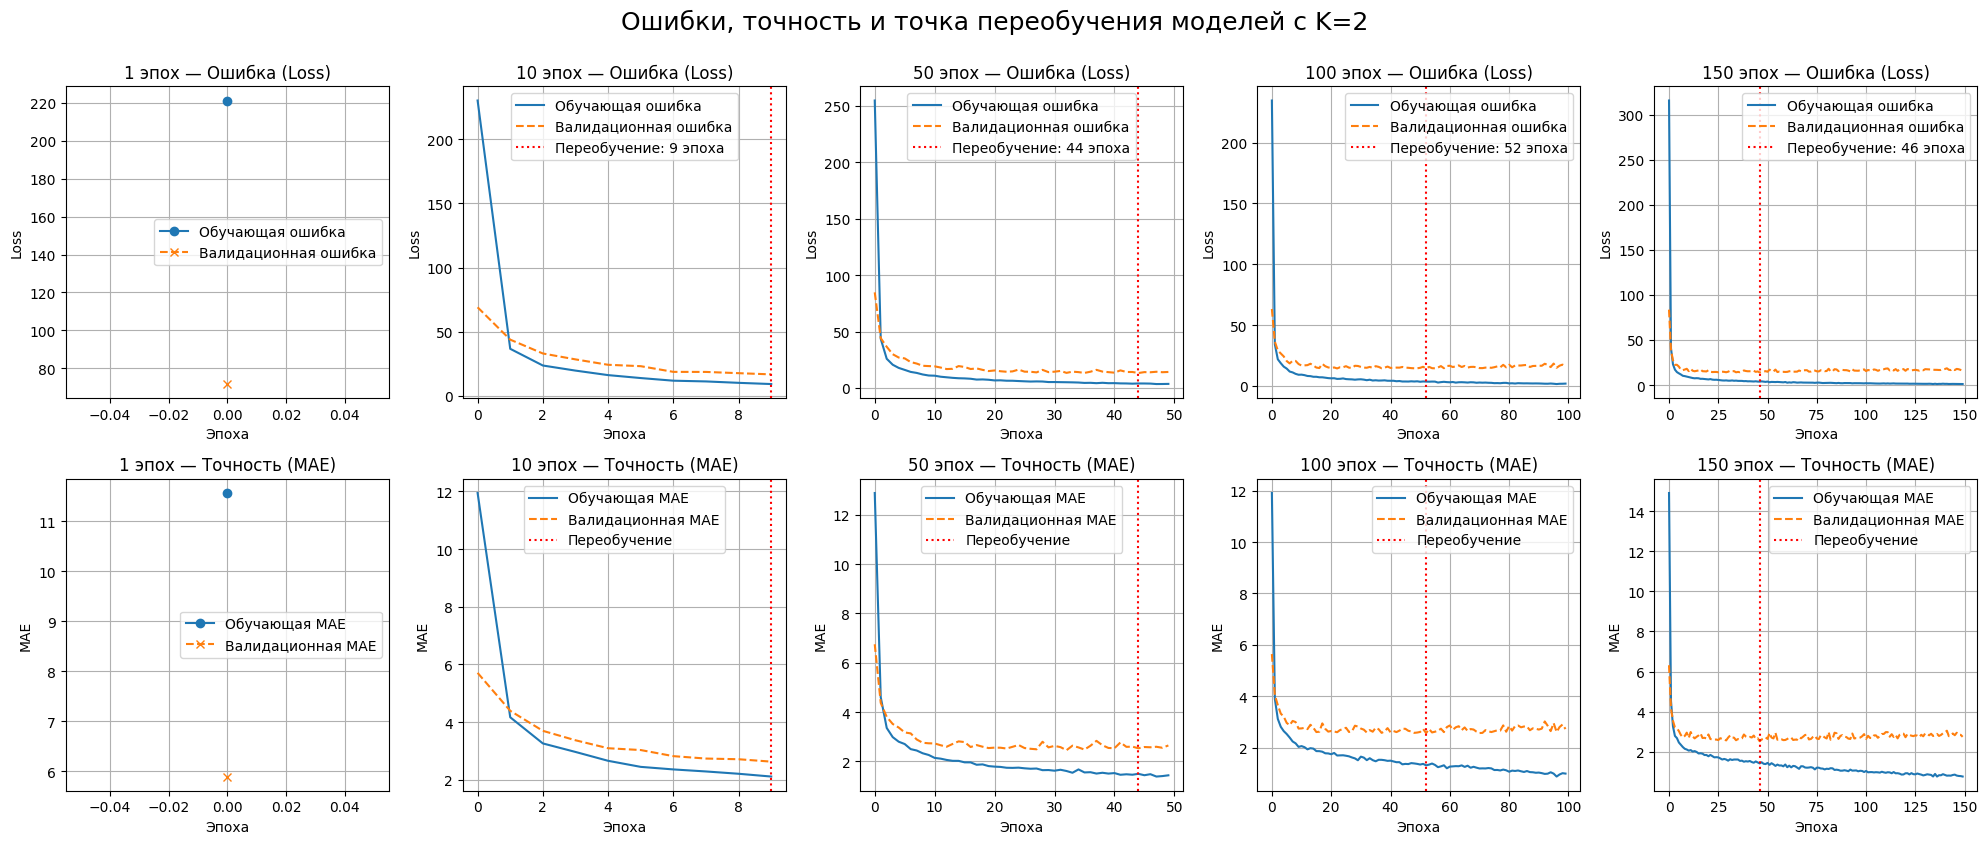

In [30]:
import matplotlib.pyplot as plt
import numpy as np

histories = [history_1_k2, history_10_k2, history_50_k2, history_100_k2, history_150_k2]
epochs_list = [1, 10, 50, 100, 150]

fig, axes = plt.subplots(2, len(histories), figsize=(20, 8))
axes = axes.reshape(2, len(histories))

for i in range(len(histories)):
    history = histories[i].history

    # --- Ошибка (Loss) ---
    loss_ax = axes[0][i]
    if len(history['loss']) == 1:
        loss_ax.plot([0], [history['loss'][0]], label='Обучающая ошибка', marker='o')
        loss_ax.plot([0], [history['val_loss'][0]], label='Валидационная ошибка', marker='x', linestyle='--')
    else:
        loss_ax.plot(history['loss'], label='Обучающая ошибка')
        loss_ax.plot(history['val_loss'], label='Валидационная ошибка', linestyle='--')

        # Находим эпоху с минимальной val_loss (точка переобучения)
        min_epoch = np.argmin(history['val_loss'])
        loss_ax.axvline(x=min_epoch, color='red', linestyle=':', label=f'Переобучение: {min_epoch} эпоха')

    loss_ax.set_title(f'{epochs_list[i]} эпох — Ошибка (Loss)')
    loss_ax.set_xlabel('Эпоха')
    loss_ax.set_ylabel('Loss')
    loss_ax.legend()
    loss_ax.grid(True)

    # --- Точность (MAE) ---
    mae_ax = axes[1][i]
    if len(history['mae']) == 1:
        mae_ax.plot([0], [history['mae'][0]], label='Обучающая MAE', marker='o')
        mae_ax.plot([0], [history['val_mae'][0]], label='Валидационная MAE', marker='x', linestyle='--')
    else:
        mae_ax.plot(history['mae'], label='Обучающая MAE')
        mae_ax.plot(history['val_mae'], label='Валидационная MAE', linestyle='--')

        # Тот же min_epoch для отображения
        mae_ax.axvline(x=min_epoch, color='red', linestyle=':', label=f'Переобучение')

    mae_ax.set_title(f'{epochs_list[i]} эпох — Точность (MAE)')
    mae_ax.set_xlabel('Эпоха')
    mae_ax.set_ylabel('MAE')
    mae_ax.legend()
    mae_ax.grid(True)

plt.tight_layout()
plt.suptitle('Ошибки, точность и точка переобучения моделей с K=2', fontsize=18, y=1.05)
plt.show()


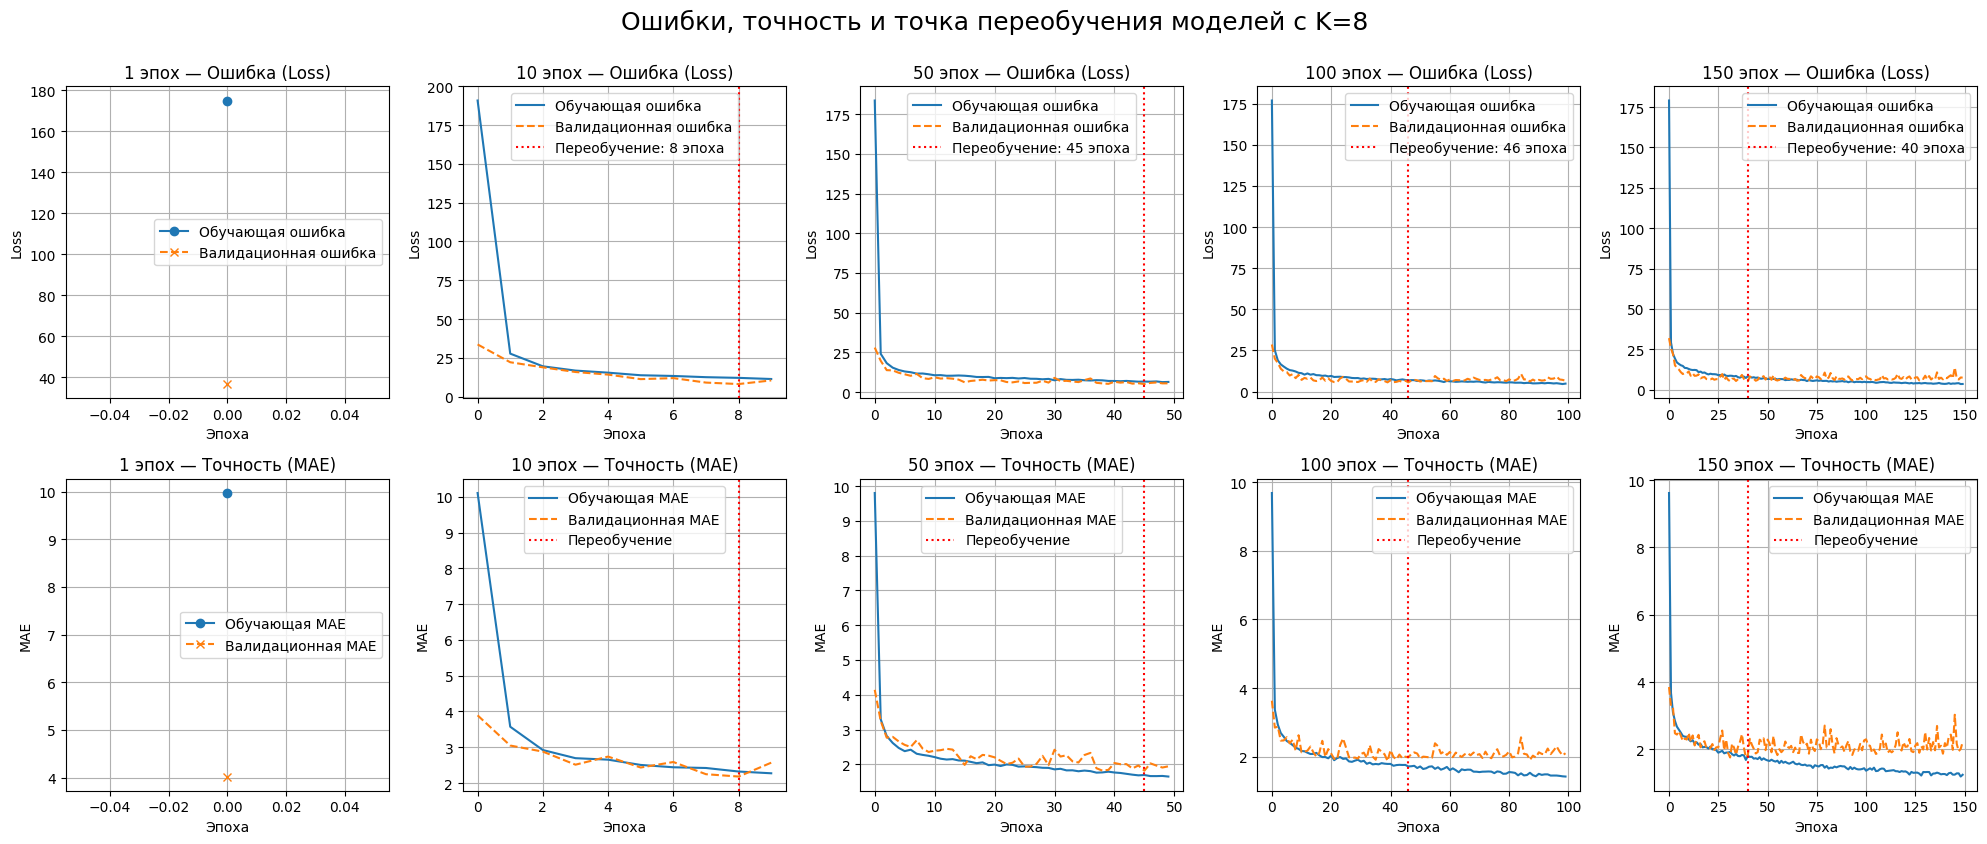

In [32]:
import matplotlib.pyplot as plt
import numpy as np

histories = [history_1_k8, history_10_k8, history_50_k8, history_100_k8, history_150_k8]
epochs_list = [1, 10, 50, 100, 150]

fig, axes = plt.subplots(2, len(histories), figsize=(20, 8))
axes = axes.reshape(2, len(histories))

for i in range(len(histories)):
    history = histories[i].history

    # --- Ошибка (Loss) ---
    loss_ax = axes[0][i]
    if len(history['loss']) == 1:
        loss_ax.plot([0], [history['loss'][0]], label='Обучающая ошибка', marker='o')
        loss_ax.plot([0], [history['val_loss'][0]], label='Валидационная ошибка', marker='x', linestyle='--')
    else:
        loss_ax.plot(history['loss'], label='Обучающая ошибка')
        loss_ax.plot(history['val_loss'], label='Валидационная ошибка', linestyle='--')

        # Находим эпоху с минимальной val_loss (точка переобучения)
        min_epoch = np.argmin(history['val_loss'])
        loss_ax.axvline(x=min_epoch, color='red', linestyle=':', label=f'Переобучение: {min_epoch} эпоха')

    loss_ax.set_title(f'{epochs_list[i]} эпох — Ошибка (Loss)')
    loss_ax.set_xlabel('Эпоха')
    loss_ax.set_ylabel('Loss')
    loss_ax.legend()
    loss_ax.grid(True)

    # --- Точность (MAE) ---
    mae_ax = axes[1][i]
    if len(history['mae']) == 1:
        mae_ax.plot([0], [history['mae'][0]], label='Обучающая MAE', marker='o')
        mae_ax.plot([0], [history['val_mae'][0]], label='Валидационная MAE', marker='x', linestyle='--')
    else:
        mae_ax.plot(history['mae'], label='Обучающая MAE')
        mae_ax.plot(history['val_mae'], label='Валидационная MAE', linestyle='--')

        # Тот же min_epoch для отображения
        mae_ax.axvline(x=min_epoch, color='red', linestyle=':', label=f'Переобучение')

    mae_ax.set_title(f'{epochs_list[i]} эпох — Точность (MAE)')
    mae_ax.set_xlabel('Эпоха')
    mae_ax.set_ylabel('MAE')
    mae_ax.legend()
    mae_ax.grid(True)

plt.tight_layout()
plt.suptitle('Ошибки, точность и точка переобучения моделей с K=8', fontsize=18, y=1.05)
plt.show()


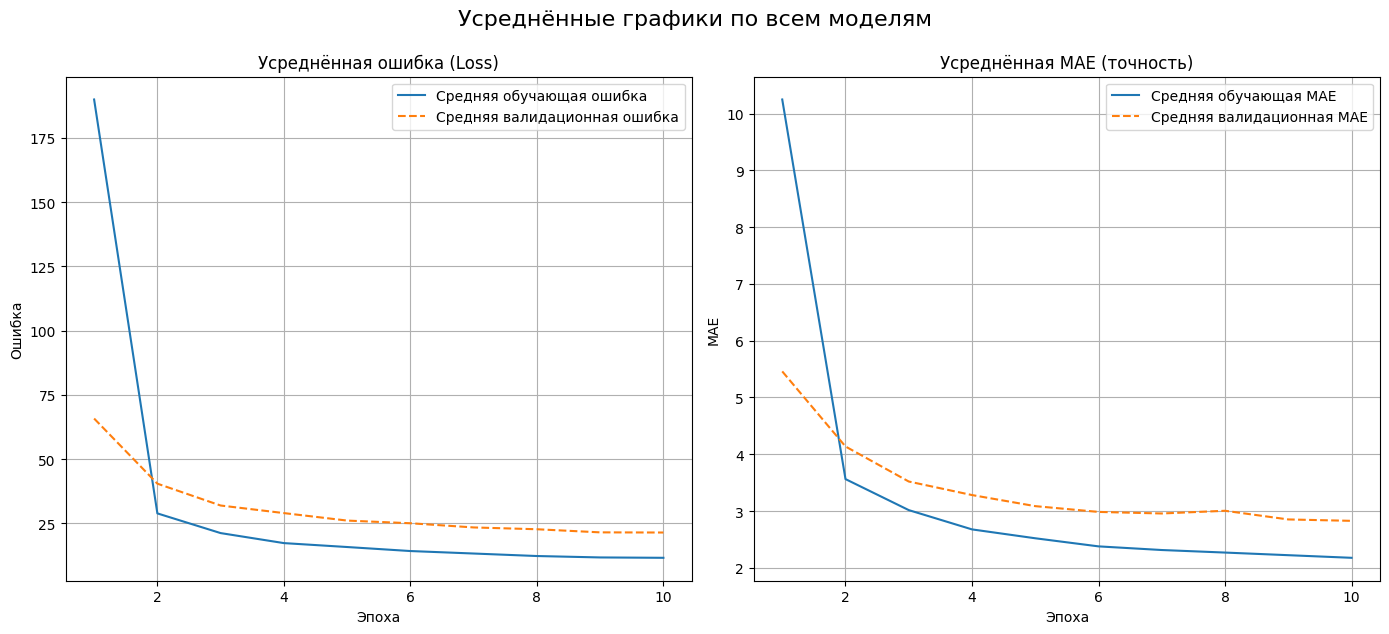

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Собираем метрики из histories
losses = []
val_losses = []
maes = []
val_maes = []
histories = [history_10, history_50, history_100, history_150]

for h in histories:
    losses.append(h.history['loss'])
    val_losses.append(h.history['val_loss'])
    maes.append(h.history['mae'])
    val_maes.append(h.history['val_mae'])

# 2. Находим минимальное количество эпох, чтобы обрезать все до одной длины
min_len = min(len(x) for x in losses)
losses = [x[:min_len] for x in losses]
val_losses = [x[:min_len] for x in val_losses]
maes = [x[:min_len] for x in maes]
val_maes = [x[:min_len] for x in val_maes]

# 3. Усредняем по всем моделям (по каждой эпохе)
avg_loss = np.mean(losses, axis=0)
avg_val_loss = np.mean(val_losses, axis=0)
avg_mae = np.mean(maes, axis=0)
avg_val_mae = np.mean(val_maes, axis=0)

# 4. Строим графики
epochs = list(range(1, min_len + 1))
plt.figure(figsize=(14, 6))

# --- Усреднённый график ошибок ---
plt.subplot(1, 2, 1)
plt.plot(epochs, avg_loss, label='Средняя обучающая ошибка')
plt.plot(epochs, avg_val_loss, label='Средняя валидационная ошибка', linestyle='--')
plt.title('Усреднённая ошибка (Loss)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.grid(True)

# --- Усреднённый график MAE ---
plt.subplot(1, 2, 2)
plt.plot(epochs, avg_mae, label='Средняя обучающая MAE')
plt.plot(epochs, avg_val_mae, label='Средняя валидационная MAE', linestyle='--')
plt.title('Усреднённая MAE (точность)')
plt.xlabel('Эпоха')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.suptitle('Усреднённые графики по всем моделям', fontsize=16, y=1.05)
plt.show()


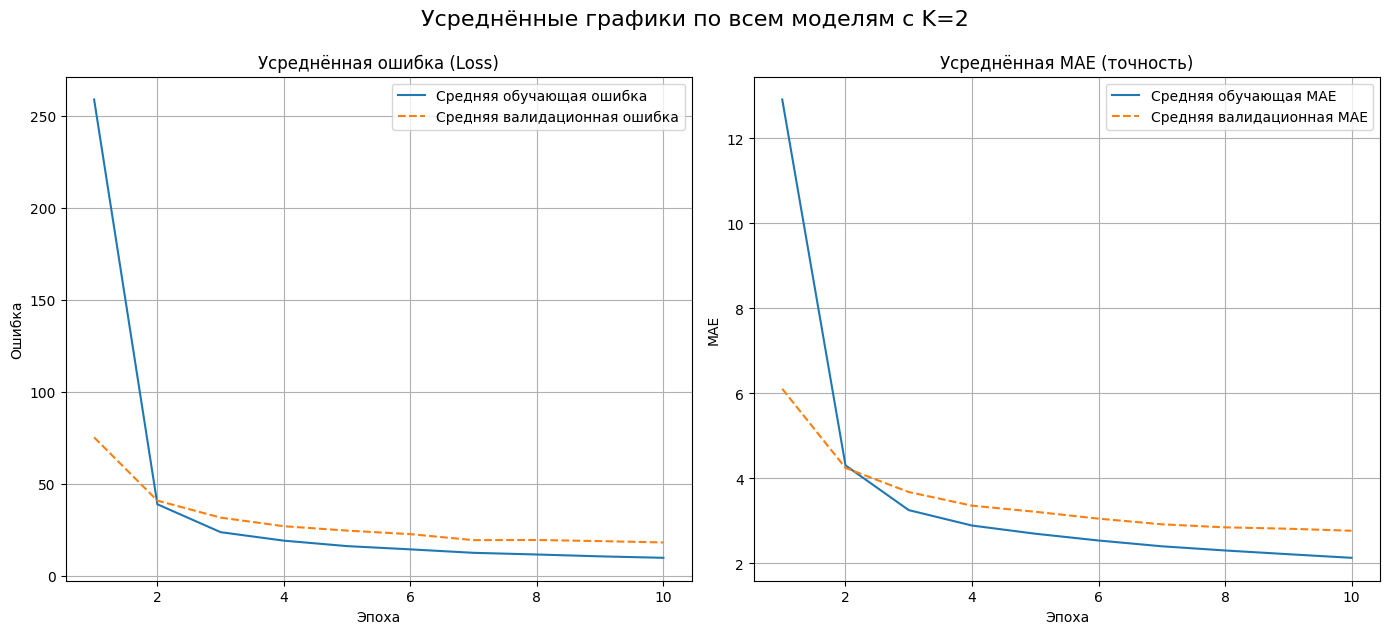

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Собираем метрики из histories
losses = []
val_losses = []
maes = []
val_maes = []
histories = [history_10_k2, history_50_k2, history_100_k2, history_150_k2]

for h in histories:
    losses.append(h.history['loss'])
    val_losses.append(h.history['val_loss'])
    maes.append(h.history['mae'])
    val_maes.append(h.history['val_mae'])

# 2. Находим минимальное количество эпох, чтобы обрезать все до одной длины
min_len = min(len(x) for x in losses)
losses = [x[:min_len] for x in losses]
val_losses = [x[:min_len] for x in val_losses]
maes = [x[:min_len] for x in maes]
val_maes = [x[:min_len] for x in val_maes]

# 3. Усредняем по всем моделям (по каждой эпохе)
avg_loss = np.mean(losses, axis=0)
avg_val_loss = np.mean(val_losses, axis=0)
avg_mae = np.mean(maes, axis=0)
avg_val_mae = np.mean(val_maes, axis=0)

# 4. Строим графики
epochs = list(range(1, min_len + 1))
plt.figure(figsize=(14, 6))

# --- Усреднённый график ошибок ---
plt.subplot(1, 2, 1)
plt.plot(epochs, avg_loss, label='Средняя обучающая ошибка')
plt.plot(epochs, avg_val_loss, label='Средняя валидационная ошибка', linestyle='--')
plt.title('Усреднённая ошибка (Loss)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.grid(True)

# --- Усреднённый график MAE ---
plt.subplot(1, 2, 2)
plt.plot(epochs, avg_mae, label='Средняя обучающая MAE')
plt.plot(epochs, avg_val_mae, label='Средняя валидационная MAE', linestyle='--')
plt.title('Усреднённая MAE (точность)')
plt.xlabel('Эпоха')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.suptitle('Усреднённые графики по всем моделям c K=2', fontsize=16, y=1.05)
plt.show()


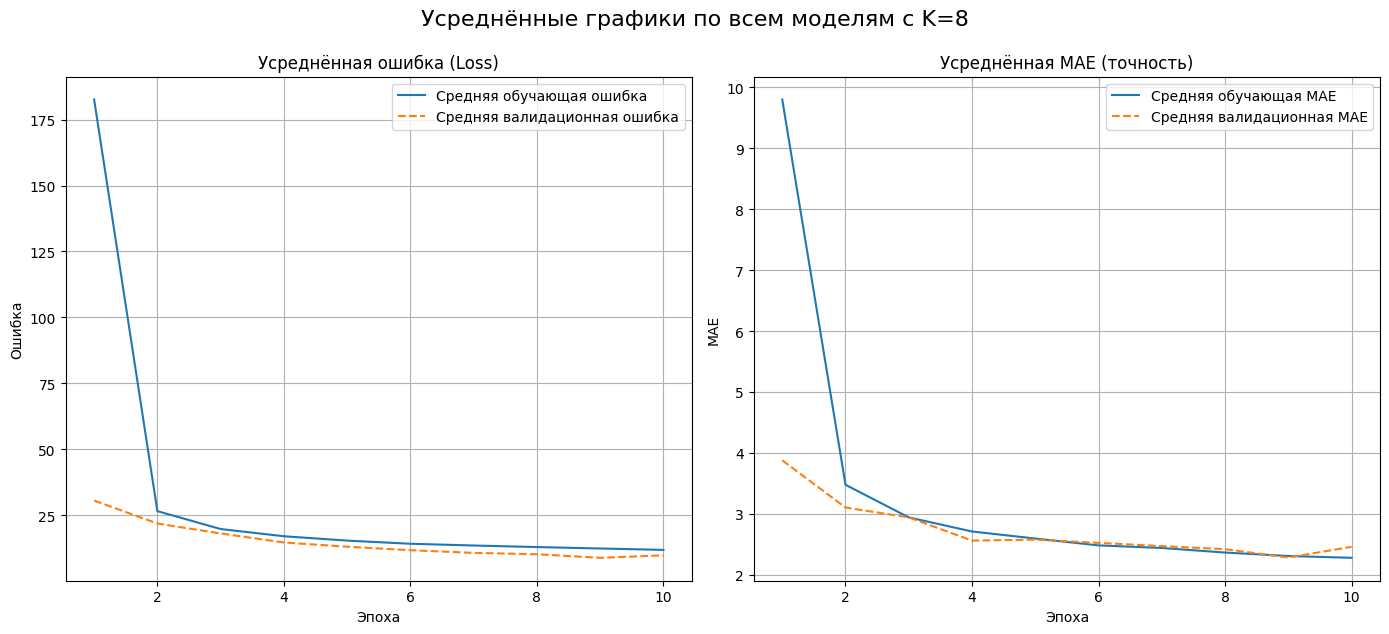

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Собираем метрики из histories
losses = []
val_losses = []
maes = []
val_maes = []
histories = [history_10_k8, history_50_k8, history_100_k8, history_150_k8]

for h in histories:
    losses.append(h.history['loss'])
    val_losses.append(h.history['val_loss'])
    maes.append(h.history['mae'])
    val_maes.append(h.history['val_mae'])

# 2. Находим минимальное количество эпох, чтобы обрезать все до одной длины
min_len = min(len(x) for x in losses)
losses = [x[:min_len] for x in losses]
val_losses = [x[:min_len] for x in val_losses]
maes = [x[:min_len] for x in maes]
val_maes = [x[:min_len] for x in val_maes]

# 3. Усредняем по всем моделям (по каждой эпохе)
avg_loss = np.mean(losses, axis=0)
avg_val_loss = np.mean(val_losses, axis=0)
avg_mae = np.mean(maes, axis=0)
avg_val_mae = np.mean(val_maes, axis=0)

# 4. Строим графики
epochs = list(range(1, min_len + 1))
plt.figure(figsize=(14, 6))

# --- Усреднённый график ошибок ---
plt.subplot(1, 2, 1)
plt.plot(epochs, avg_loss, label='Средняя обучающая ошибка')
plt.plot(epochs, avg_val_loss, label='Средняя валидационная ошибка', linestyle='--')
plt.title('Усреднённая ошибка (Loss)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.grid(True)

# --- Усреднённый график MAE ---
plt.subplot(1, 2, 2)
plt.plot(epochs, avg_mae, label='Средняя обучающая MAE')
plt.plot(epochs, avg_val_mae, label='Средняя валидационная MAE', linestyle='--')
plt.title('Усреднённая MAE (точность)')
plt.xlabel('Эпоха')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.suptitle('Усреднённые графики по всем моделям c K=8', fontsize=16, y=1.05)
plt.show()
